# Deep Learning for Business Applications course

## TOPIC 2: Introduction to Computer Vision. Intro to CNNs

### 1. Libraries

In [2]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

### 2. MNIST dataset

About [MNIST dataset](https://yann.lecun.com/exdb/mnist/):
- handwritten digits 0, 1, …, 9
- 28x28 size (784 pixels)
- training set of 60 000 and a test set of 10 000 examples
- grey scale colored

#### 2.1. Load the dataset

In [3]:
train_data = torchvision.datasets.MNIST('./data', download=True)
test_data = torchvision.datasets.MNIST('data', train=False)
print(train_data)
print(test_data)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:03<00:00, 2.52MB/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 199kB/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:02<00:00, 688kB/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 61.7MB/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test


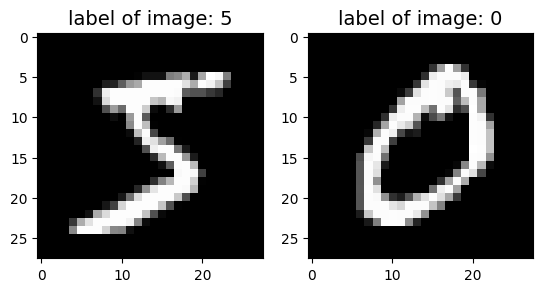

In [4]:
plt.subplot(1, 2, 1)
image, label = train_data[0]
plt.imshow(image, cmap='gray')
plt.title('label of image: {}'.format(label), fontsize=14)
plt.subplot(1, 2, 2)
image, label = train_data[1]
plt.imshow(image, cmap='gray')
plt.title('label of image: {}'.format(label), fontsize=14)
plt.show()

In [5]:
type(image)

PIL.Image.Image

In [6]:
img_arr = np.asarray(image)
img_arr.shape

(28, 28)

In [7]:
img_arr

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

### 2.2. Basic transformations

In [8]:
# NOTE: NN likes input in range (0, 1)
# Convert input images to tensors and normalize
# Usually, 'transforms.ToTensor()' is used to turn
# the input data in the range # of [0,255]
# to a 3-dimensional Tensor.
# This function automatically scales the
# input data to the range of [0,1].
# (This is equivalent to scaling the data down to 0,1)
# The scaled mean and standard deviation
# of the MNIST dataset (precalculated):
# data_mean = 0.1307
# data_std = 0.3081

transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    #torchvision.transforms.Normalize(  # apply if needed
    #    (data_mean, ),
    #    (data_std, )
    #)
    ])
train_data = torchvision.datasets.MNIST(
    'data',
    train=True,
    transform=transform
)
test_data = torchvision.datasets.MNIST(
    'data',
    train=False,
    transform=transform
)

## 3. Models

### 3.1. Data loaders for training pipeline

In [9]:
BATCH_SIZE = 100
INPUT_SIZE = 28 * 28
NUM_CLASSES = 10
LEARNING_RATE = .001
NUM_EPOCHS = 5

In [10]:
train_loader = torch.utils.data.DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

### 3.2. Logistic regression

Let's implement logistic regression with help of Pytorch:

In [11]:
# Just one fully connected layer
# will give us a regression

class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, feature):
        output = self.linear(feature)
        return output

In [12]:
model = LogisticRegression(
    INPUT_SIZE,
    NUM_CLASSES
)

# The Cross-Entropy Loss is derived from the principles of maximum
# likelihood estimation when applied to the task of classification.
# Maximizing the likelihood is equivalent to minimizing the negative
# log-likelihood. In classification, the likelihood function can be
# expressed as the product of the probabilities of the correct classes:
# Binary Cross-Entropy Loss and Multiclass Cross-Entropy Loss
# are two variants of cross-entropy loss, each tailored to different
# types of classification tasks:
loss = nn.CrossEntropyLoss()

# about `Adam` optimizer
# https://pytorch.org/docs/stable/generated/torch.optim.Adam.html
# it works well in most of cases
optimizer = torch.optim.Adam(
    model.parameters(),
    lr=LEARNING_RATE
)

In [13]:
for epoch in range(NUM_EPOCHS):
    correct = 0
    for i, (images, labels) in enumerate(train_loader):
        images = torch.autograd.Variable(images.view(-1, INPUT_SIZE))
        labels = torch.autograd.Variable(labels)

        # nullify gradients w.r.t. parameters
        optimizer.zero_grad()
        # forward propagation
        output = model(images)
        # compute loss based on obtained value and actual label
        compute_loss = loss(output, labels)
        # backward propagation
        compute_loss.backward()
        # update the parameters
        optimizer.step()

        # Total correct predictions
        predicted = torch.max(output.data, 1)[1]
        correct += (predicted == labels).sum()
        if i % 50 == 0:
            print(
                'Epoch {} - training [{}/{} ({:.0f}%)] loss: {:.3f}, accuracy: {:.2f}%'.format(
                    epoch,
                    i * len(images),
                    len(train_loader.dataset),
                    100 * i / len(train_loader),
                    compute_loss.item(),
                    float(correct * 100) / float(BATCH_SIZE * (i + 1))
                ),
                end='\r'
            )

    # check total accuracy of predicted value and actual label
    accurate = 0
    total = 0
    for images, labels in test_loader:
        images = torch.autograd.Variable(images.view(-1, INPUT_SIZE))
        output = model(images)
        _, predicted = torch.max(output.data, 1)
        compute_loss = loss(output, labels)
        # total labels
        total += labels.size(0)

        # Total correct predictions
        accurate += (predicted == labels).sum()
        accuracy_score = 100 * accurate/total

    print('Epoch {} - validation loss: {:.3f}, validation accuracy: {:.2f}%        '.format(
        epoch,
        compute_loss.item(),
        accuracy_score
    ))

Epoch 0 - validation loss: 0.514, validation accuracy: 90.57%        
Epoch 1 - validation loss: 0.441, validation accuracy: 91.54%        
Epoch 2 - validation loss: 0.415, validation accuracy: 91.94%        
Epoch 3 - validation loss: 0.383, validation accuracy: 92.27%        
Epoch 4 - validation loss: 0.391, validation accuracy: 92.43%        


### 3.3. CNN approach

Now will use simple convolutional neural network with couple of convolutional layers. Few points before network building:
- [about](https://docs.python.org/3/library/functions.html#super) `super` in Python. It allows you to call methods defined in the superclass from the subclass, enabling you to extend and customize the functionality inherited from the parent class
- [about](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) `Conv2d` layer in Pytorch
- [about](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html) `Dropout` layers in Pytorch

In [14]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding='valid')
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding='valid')
        self.dropout1 = nn.Dropout(.5)
        self.dropout2 = nn.Dropout(.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)  # you may need to comment this line for HA
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)  # you may need to comment this line for HA
        x = self.fc2(x)
        output = F.softmax(x, dim=1)
        return output

In [15]:
model = SimpleCNN(NUM_CLASSES)
optimizer = torch.optim.Adam(
    model.parameters(),
    lr=LEARNING_RATE
)
loss = nn.CrossEntropyLoss()

### <font color='red'>HOME ASSIGNMENT</font>

You have to make few experiments:
1. Just run training CNN framework (code cell below) and observe if validation accuracy changes (get higher or lower)
2. Try to play with `Dropout` layers e.g. remove them, re-run model creation and training cells of the notebook, observe if validation accuracy changes (get higher or lower)
3. __(ADVANCED)__ Try CNN without `max_pool2d` layer, what has happened?

In [16]:
for epoch in range(NUM_EPOCHS):
    correct = 0
    for i, (images, labels) in enumerate(train_loader):
        images = torch.autograd.Variable(images)
        labels = torch.autograd.Variable(labels)

        # Nullify gradients w.r.t. parameters
        optimizer.zero_grad()
        # forward propagation
        output = model(images)
        # compute loss based on obtained value and actual label
        compute_loss = loss(output, labels)
        # backward propagation
        compute_loss.backward()
        # update the parameters
        optimizer.step()

        # total correct predictions
        predicted = torch.max(output.data, 1)[1]
        correct += (predicted == labels).sum()
        if i % 50 == 0:
            print(
                'Epoch {} - training [{}/{} ({:.0f}%)] loss: {:.3f}, accuracy: {:.2f}%'.format(
                    epoch,
                    i * len(images),
                    len(train_loader.dataset),
                    100 * i / len(train_loader),
                    compute_loss.item(),
                    float(correct * 100) / float(BATCH_SIZE * (i + 1))
                ),
                end='\r'
            )

    # check total accuracy of predicted value and actual label
    accurate = 0
    total = 0
    for images, labels in test_loader:
        images = torch.autograd.Variable(images)
        output = model(images)
        _, predicted = torch.max(output.data, 1)
        compute_loss = loss(output, labels)
        # total labels
        total += labels.size(0)

        # total correct predictions
        accurate += (predicted == labels).sum()
        accuracy_score = 100 * accurate/total

    print('Epoch {} - validation loss: {:.3f}, validation accuracy: {:.2f}%        '.format(
        epoch,
        compute_loss.item(),
        accuracy_score
    ))

Epoch 0 - validation loss: 1.531, validation accuracy: 94.26%        
Epoch 1 - validation loss: 1.529, validation accuracy: 95.89%        
Epoch 2 - validation loss: 1.499, validation accuracy: 96.21%        
Epoch 3 - validation loss: 1.483, validation accuracy: 96.64%        
Epoch 4 - validation loss: 1.507, validation accuracy: 96.91%        
